In [1]:
#file = '/home/james/Documents/test_images/tmpcrystfel_xgandalf.stream'
file = '/home/james/Documents/test_images/crystfel_xgandalf.stream'
# streamfile = open(file, 'r')
# raw = streamfile.read()
# Determine how many chunks:
sum = 0
with open(file) as fp:
	for line in fp:
		if line == '----- Begin chunk -----\n':
			sum = sum + 1

dat = [None] * (sum)
idx = 0
with open(file) as fp:
	for line in fp:
		if line == '----- Begin chunk -----\n':
			idx = idx + 1
			dat[idx - 1]=line
		if idx > 0:
			dat[idx-1] = dat[idx-1] + line

indexed = []
for chunk in dat:
	if 'indexed_by = none' not in chunk:
		indexed.append(chunk)

In [15]:
# tmppeaks=[]
# write=0
# for line in indexed:
#     if line=='  fs/px   ss/px (1/d)/nm^-1   Intensity  Panel\n':
#         write=1
#         print('yes')
#     if line=='End of peak list\n':
#         write=0
#     if write==1:
#         tmppeaks.append(line)

In [92]:
start = indexed[0].find("  fs/px   ss/px (1/d)/nm^-1   Intensity  Panel\n") + len("  fs/px   ss/px (1/d)/nm^-1   Intensity  Panel\n")
end = indexed[0].find("End of peak list\n")


#print('Peak: \n', between(indexed[0], peakstart,peakend))
#print('Crystal: \n', between(indexed[0], cryststart,crystend))

In [2]:
import numpy as np


def between(str,a,b):
    i = str.find(a) + len(a)
    j = str.find(b)
    return str[i:j]

def reflectsort(line):
    h=float(line[0:4])
    k=float(line[5:9])
    l=float(line[10:14])
    I=float(line[14:26])
    sigI=float(line[27:36])
    peak=float(line[37:47])
    bck=float(line[48:58])
    x=float(line[59:65])
    y=float(line[66:72])
    return [h,k,l,I,sigI,peak,bck,x,y]

def peaksort(line):
    x = float(line[0:7])
    y = float(line[8:15])
    d = float(line[16:26])
    I = float(line[26:38])
    return [x, y, d, I]


def indexedsort(indexed):
    peakstart = "  fs/px   ss/px (1/d)/nm^-1   Intensity  Panel\n"
    peakend= "End of peak list\n"
    cryststart = "   h    k    l          I   sigma(I)       peak background  fs/px  ss/px panel"
    crystend ="End of reflections"
    reflect = (between(indexed, cryststart,crystend).split('\n'))
    peaks= (between(indexed, peakstart,peakend).split('\n'))
    tmp=[]
    for line in peaks:
        if line!='':
            tmp.append(peaksort(line))
    peaks = np.asarray(tmp)

    tmp=[]
    for line in reflect:
        if line!='':
            tmp.append(reflectsort(line))
    reflect =np.asarray(tmp)

    return [peaks,reflect]

In [26]:
#peaks, reflect = indexedsort(indexed[0])
allpeaks = []
allrefle = []

for val in indexed:
    p , f = indexedsort(val)
    if allpeaks==[]: allpeaks = p
    else: allpeaks = np.append(allpeaks,p)
    if allrefle==[]: allrefle = f
    else: allrefle = np.append(allrefle, f)

allpeaks=np.reshape(allpeaks,[int(len(allpeaks)/4),4])
allrefle=np.reshape(allrefle,[int(len(allrefle)/9),9])
#D=pd.DataFrame(allpeaks)

/home/james/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  import sys
/home/james/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if __name__ == '__main__':


In [32]:
file1 = '/home/james/Documents/test_images/peaks.dat'
file2 = '/home/james/Documents/test_images/reflect.dat'
np.save(file1,allpeaks)
np.save(file2,allrefle)

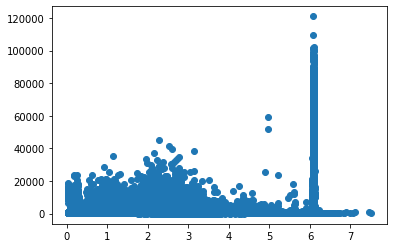

In [31]:
import matplotlib.pyplot as plt

plt.scatter(allpeaks[:,2],allpeaks[:,3])
plt.show()
#plt.scatter(peaks[:,0],peaks[:,1])

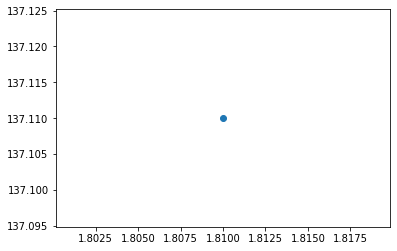

In [29]:
plt.scatter(allpeaks[1,2],allpeaks[1,3])


In [34]:
#peaksDF=pd.DataFrame(peaks,columns=['x','y','res','I'])
reflectDF=pd.DataFrame(allrefle,columns=['h','k','l','I','sigI','peak','bck','x','y'])
reflectDF
#peaksDF

,h,k,l,I,sigI,peak,bck,x,y
0,-22.0,3.0,31.0,-9.69,5.89,5.0,1.47,1817.6,41.7
1,-21.0,-15.0,3.0,-4.11,9.33,6.0,2.56,965.9,15.0
2,-21.0,-4.0,15.0,-15.06,8.32,7.0,2.28,1351.2,94.7
3,-21.0,-2.0,18.0,14.03,8.31,6.0,1.86,1438.9,104.0
4,-21.0,4.0,30.0,-6.06,5.87,4.0,1.28,1788.7,113.3
5,-21.0,6.0,36.0,4.42,5.55,3.0,0.92,1973.1,102.7
6,-20.0,-21.0,-3.0,9.42,7.95,6.0,1.92,754.0,12.9
7,-20.0,-11.0,5.0,9.42,9.08,9.0,2.92,1054.7,104.4
8,-20.0,-10.0,6.0,-5.42,8.86,8.0,3.08,1087.3,112.0
9,-20.0,-9.0,7.0,-13.28,11.10,9.0,3.39,1119.9,119.7


In [67]:
A=np.asarray([[1,2,3,4],[1,2,3,3],[6,7,8,4]])
B=[]
for val in A:
    print(val[3])
    if val[3]>3:
        if B==[]: B=val
        else: B=np.append(B,val)
#
B = np.reshape(B, [int(len(B)/4),4])
 #np.reshape()
print(A)
print(B)

#A[:,3]

4
3
4
[[1 2 3 4]
 [1 2 3 3]
 [6 7 8 4]]
[[1 2 3 4]
 [6 7 8 4]]


/home/james/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  


In [ ]:
sig=2
cutdat=[]
for line in allrefle:
	if line[3] / line[4] > sig:
		if len(cutdat)==0: cutdat=line
		else: cutdat = np.append(cutdat, line)

In [ ]:
print
















